# Handout\#1

## Load data

In [1]:
import numpy as np

In [2]:
group = '02' # Bernat Ladaria, Lluís
ds = 1 # assuming problem 1

In [3]:
data_train = np.loadtxt('ds' + group + str(ds) + 'tr.txt')

In [4]:
X_train_raw = data_train[:, 0:2]
y_train = data_train[:, 2]

Check classes

In [5]:
np.unique(y_train)

array([0., 1.])

In [6]:
data_test = np.loadtxt('ds' + group + str(ds) + 'te.txt')

In [7]:
X_test_raw = data_test[:, 0:2]
y_test = data_test[:, 2]

In [8]:
np.unique(y_test)

array([0., 1.])

## Normalize data

Will use StandardScaler, that results in a N(0,1) distribution.

In [9]:
from sklearn.preprocessing import StandardScaler

Compute transformer parameters.

In [10]:
scaler = StandardScaler().fit(X_train_raw)

Apply transformation.

In [11]:
X_train = scaler.transform(X_train_raw)

Also, the same transformation to testing data.

In [12]:
X_test = scaler.transform(X_test_raw)

Check-it. Mean must be (almost) zero, and standard deviation must be near the unit.

In [13]:
X_train.mean(axis=0)

array([2.96681082e-16, 1.12219262e-15])

In [14]:
X_train.std(axis=0)

array([1., 1.])

In [15]:
X_test.mean(axis=0)

array([-5.10290468e-02,  8.18370561e-05])

In [16]:
X_test.std(axis=0)

array([0.97118785, 0.98317379])

## Create a Feed-Forward Neural Networ (FFNN) based classifier

Will use Keras as top API

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

Define an auxiliary function to optimizer creation

In [18]:
from tensorflow.keras.optimizers import RMSprop, SGD

In [19]:
def create_optimizer() -> object:
    
    # try Adam
#    opt = "adam"
    
    # try SGD with Nesterov
#    opt = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    
    # try RMSprop
    opt = RMSprop(learning_rate=0.01,  # inittial learning rate
                  rho=0.8,             # discounting factor
                  momentum=0.8         # also, adjusting velocity
                 )
    
    return opt

Define an auxiliary function to encapsulate NN creation

In [20]:
def create_ffnn_model(n_inputs: int, n_layers: list, activ_layers: list) -> object:
    # n_inputs: 
    # n_layers:
    # activ_layers:
    
    # Create an empty sequential NN
    model = keras.Sequential()
    
    # Add the input
    model.add(keras.Input(shape=(n_inputs,)))
    
    # Create hidden and last full connected (Dense class) layers
    for i in range(len(n_layers)):
        model.add(layers.Dense(n_layers[i], activation = activ_layers[i]))
        
    opt = create_optimizer()
    
    # Compile model to configure the learning process
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
    
    return model

Define another function to evaluate best instance from N ones

In [21]:
def best_fitted(n_instances: int, n_epochs: int, 
                X: np.ndarray, y: np.ndarray, 
                X_test: np.ndarray, y_test: np.ndarray, 
                n_inputs: int, n_layers: list, activ_layers: list) -> object:
    
    # Some hyper-params
    bs = len(X)
    validation = 0.2
    
    # List of models to fit
    models = list()
    histories = list()
    evaluations = list()
    
    # Create and fit all the *n_instances* models
    for i in range(n_instances):
        model = create_ffnn_model(n_inputs, n_layers, activ_layers)
        history = model.fit(X, y, verbose=0, batch_size=bs, epochs=n_epochs, validation_split=validation)
        evaluation = model.evaluate(X_test, y_test, verbose=0)
        
        models.append(model)
        histories.append(history.history)
        evaluations.append(evaluation)
    
    # Select the best one
    best_model = None
    best_model_history = None
    best_model_eval_score = None
    for i in range(n_instances):
        if best_model_eval_score is None or evaluations[i][1] > best_model_eval_score[1]:
            best_model = models[i]
            best_model_history = histories[i]
            best_model_eval_score = evaluations[i]

    return best_model, best_model_history, best_model_eval_score

### Create and select best 321 FFNN

In [22]:
n_inputs = 2
n_layers1 = [3, 2, 1]
activ_layers = ['relu', 'relu', 'sigmoid']

# who is who?
_class_w1 = 1
_class_w2 = 0

# Classifying threshold
# from FFNN output
# It depends on output activation function image set
#
# Im[sigmoid] = (0,1)
_output_class_threshold = 0.5

# Im[tanh] = (-1, 1)
#_output_class_threshold = 0

In [23]:
n_instances = 3
n_epochs = 200

In [24]:
[model_321, history_321, eval_321] = \
    best_fitted(n_instances, n_epochs,
                X_train, y_train, 
                X_test, y_test, 
                n_inputs, n_layers1, activ_layers)

2022-03-17 17:05:07.717461: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-17 17:05:07.717820: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-17 17:05:07.719271: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-17 17:05:07.813236: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-17 17:05:07.831762: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


In [25]:
print(eval_321)

[0.16312679648399353, 0.925000011920929]


### Create and select best 541 FFNN

In [26]:
n_layers2 = [5, 4, 1]

In [27]:
[model_541, history_541, eval_541] = \
    best_fitted(n_instances, n_epochs,
                X_train, y_train, 
                X_test, y_test, 
                n_inputs, n_layers2, activ_layers)

In [28]:
print(eval_541)

[0.08858262002468109, 0.96875]


### Create and select best 761 FFNN

In [29]:
n_layers3 = [7, 6, 1]

In [30]:
[model_761, history_761, eval_761] = \
    best_fitted(n_instances, n_epochs,
                X_train, y_train, 
                X_test, y_test, 
                n_inputs, n_layers3, activ_layers)

In [31]:
print(eval_761)

[0.08810194581747055, 0.96875]


## Plots and reports

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [33]:
def plot_results(model, X, y):
    
    # w1 class: y==1
    # w2 class: y==0
    
    w1i = np.array(np.where(y == _class_w1))
    w2i = np.array(np.where(y == _class_w2))
    
    # plot samples

    plt.figure()
    plt.plot(X[w1i,0],X[w1i,1],'+r')
    plt.plot(X[w2i,0],X[w2i,1],'+b')
    plt.axis('equal')
    plt.title('samples and decision boundary')
    
    # plot the decision boundary
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    ZZ = model.predict(xy)
    
    # plot the boundary
    
    ax.contour(XX, YY, ZZ.reshape(XX.shape), colors='k', 
               levels=[_output_class_threshold], alpha=0.5, linestyles=['--'])
    plt.show(block=False) # to force visualization
    
    # plot the classification map
    
    plt.figure()
    plt.imshow(ZZ.reshape(XX.shape).T, origin='lower', 
               extent=(xlim[0], xlim[1], ylim[0], ylim[1]),
               cmap='coolwarm', vmin=0, vmax=1)
    plt.colorbar()
    plt.plot(X[w1i,0],X[w1i,1],'+k') # black
    plt.plot(X[w2i,0],X[w2i,1],'+w') # white
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
    plt.title('classification map')
    plt.show(block=False) # to force visualization

In [34]:
def plot_history(history: dict):
    
    # extract values list from dictionary
    loss = history['loss']
    val_loss = history['val_loss']
    accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']
    
    # plot loss
    plt.figure()
    plt.plot(loss, label='train')
    plt.plot(val_loss, label='validation')
    plt.title('loss')
    plt.legend()
    plt.show(block=False)    
    
    # plot accuracy
    plt.figure()
    plt.plot(accuracy, label='train')
    plt.plot(val_accuracy, label='validation')
    plt.title('accuracy')
    plt.legend()
    plt.show(block=False)

In [35]:
def crisp_vector(vector: np.ndarray, threshold: float, class_list: list()) -> np.ndarray:
    
    # vector to crisp one
    
    hard = np.where(vector >= threshold, max(class_list), min(class_list))
    
    return hard

In [36]:
def pretty_print_cm(cm: np.ndarray):
    line = '          '
    for j in range(0, cm.shape[1]):
        line = line + (' Predict {:1}'.format(j))
    print(line)
    for i, row in enumerate(cm):
        line = 'Class {:1}: '.format(i) + ''.join(''.join(['{:10}'.format(element) for element in row]))
        print(line)

In [37]:
def print_cm(model, X: np.ndarray, y: np.ndarray):

    # compute the predictions
    y_pred_ = model.predict(X)
    
    # binary prediction: {0, 1} values
    y_pred = crisp_vector(y_pred_, _output_class_threshold, [_class_w1, _class_w2])
    
    # make class predictions with the model
    cm = confusion_matrix(y, y_pred)
    
    pretty_print_cm(cm)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
def print_metrics(model, X: np.ndarray, y: np.ndarray):
    
    y_pred_ = model.predict(X)
    y_pred = crisp_vector(y_pred_, _output_class_threshold, [_class_w1, _class_w2])
    
    # Accuracy = (tn + tp) / (tn + fp + tp + fn)
    accuracy = accuracy_score(y_true=y, y_pred=y_pred)
    
    # Precision = tp / (tp + fp)
    precision = precision_score(y_true=y, y_pred=y_pred)
    
    # Recall = tp / (tp + fn)
    recall = recall_score(y_true=y, y_pred=y_pred)
    
    # F1 = 2 * (precision * recall) / (precision + recall)
    f1 = f1_score(y_true=y, y_pred=y_pred)
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1:        {f1:.4f}")

### Plots and reports 321 FFNN

#### Evolution of the loss function and the accuracy for the training and validation sets

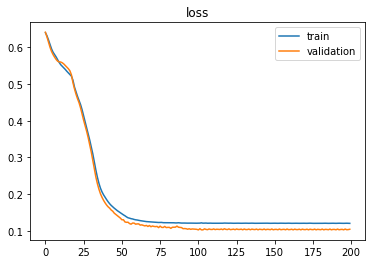

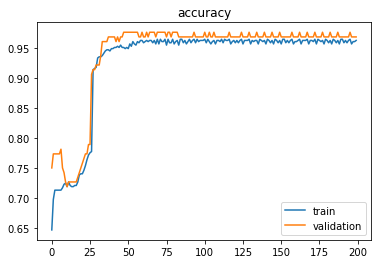

In [40]:
plot_history(history_321)

#### Classification map

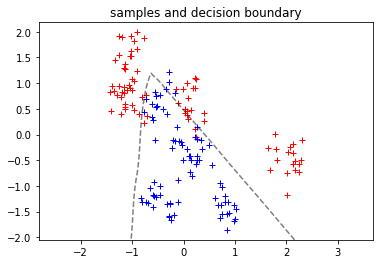

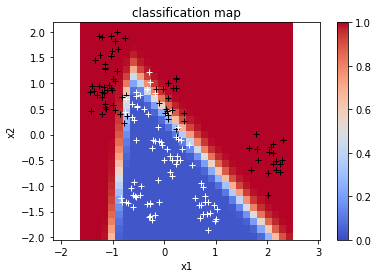

In [41]:
plot_results(model_321, X_test, y_test)

#### Confusion matrices

For *training set*

In [42]:
print_cm(model_321, X_train, y_train)

           Predict 0 Predict 1
Class 0:        313         7
Class 1:         15       305


For *test set*

In [43]:
print_cm(model_321, X_test, y_test)

           Predict 0 Predict 1
Class 0:         76         4
Class 1:          8        72


#### Test accuracy, test precision, test recall and test f1-score

In [44]:
print_metrics(model_321, X_test, y_test)

Accuracy:  0.9250
Precision: 0.9474
Recall:    0.9000
F1:        0.9231


### Plots and reports 541 FFNN

#### Evolution of the loss function and the accuracy for the training and validation sets

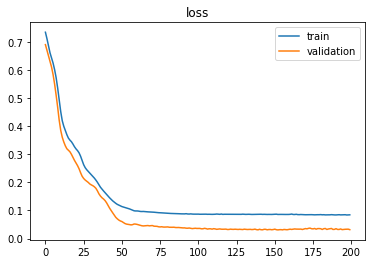

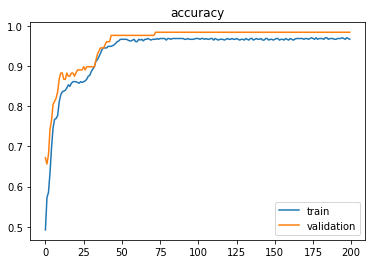

In [45]:
plot_history(history_541)

#### Classification map

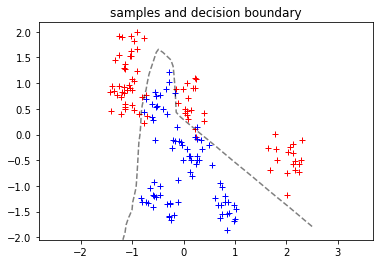

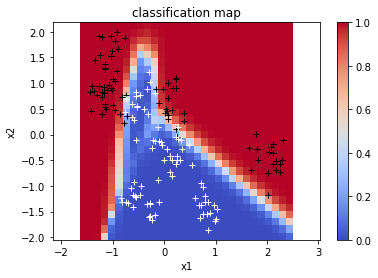

In [46]:
plot_results(model_541, X_test, y_test)

#### Confusion matrices

For *training set*

In [47]:
print_cm(model_541, X_train, y_train)

           Predict 0 Predict 1
Class 0:        314         6
Class 1:         13       307


For *test set*

In [48]:
print_cm(model_541, X_test, y_test)

           Predict 0 Predict 1
Class 0:         79         1
Class 1:          4        76


#### Test accuracy, test precision, test recall and test f1-score

In [49]:
print_metrics(model_541, X_test, y_test)

Accuracy:  0.9688
Precision: 0.9870
Recall:    0.9500
F1:        0.9682


### Plots and reports 761 FFNN

#### Evolution of the loss function and the accuracy for the training and validation sets

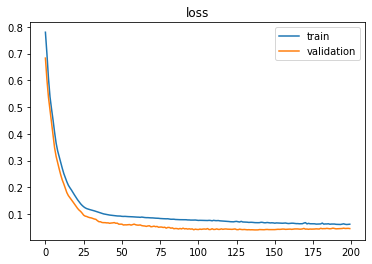

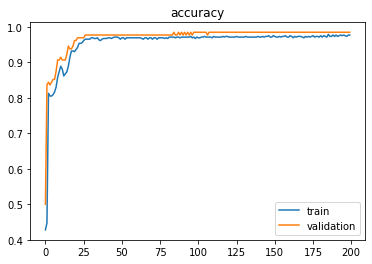

In [50]:
plot_history(history_761)

#### Classification map

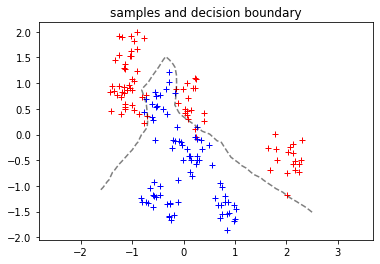

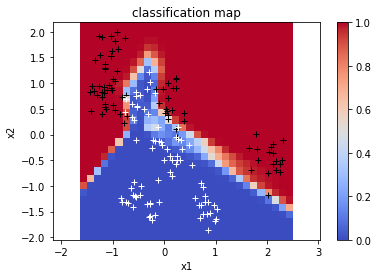

In [51]:
plot_results(model_761, X_test, y_test)

#### Confusion matrices

For *training set*

In [52]:
print_cm(model_761, X_train, y_train)

           Predict 0 Predict 1
Class 0:        316         4
Class 1:         10       310


For *test set*

In [53]:
print_cm(model_761, X_test, y_test)

           Predict 0 Predict 1
Class 0:         78         2
Class 1:          3        77


#### Test accuracy, test precision, test recall and test f1-score

In [54]:
print_metrics(model_761, X_test, y_test)

Accuracy:  0.9688
Precision: 0.9747
Recall:    0.9625
F1:        0.9686


## Comentaris i conclusions

Inicialment vàrem provar de fer servir l'optimitzador *Adam*, 
però atès que aquest optimitzador requeria d'un número relativament elevat 
d'èpoques per a assolir bons resultats (más de 1000), 
hem optat per provar altres optimitzadors 
com l'optimitzador *SGD* i l'*RMSprop*.

Aquest darrer optimitzador ha obtingut els millors resultats 
de convergència, essent el que de tots tres ha necessitat menys èpoques
(menys de 200, en front a les més de 500 de SGD i les més de 1500 de *Adam*.

Com a funcions s'activació i per tal de poder comparar els diferents 
algorismes d'optimització, sempre hem fet servir 
*ReLu* a les dues capes ocultes i una funció de tipus *sigmoide* a la sortida.

Moltes de gràcies per tot.